TrialNumber 3, estimation error 59.19999999999998
TrialNumber 4, estimation error 3.549999999999984
TrialNumber 5, estimation error 2.5999799999999205
TrialNumber 6, estimation error 85.60000000000005
TrialNumber 7, estimation error 46.05001000000002
TrialNumber 8, estimation error 2.7999999999999416
TrialNumber 9, estimation error 66.50000000000001
TrialNumber 10, estimation error 36.65000000000001
TrialNumber 11, estimation error 43.40000000000003
TrialNumber 12, estimation error 43.55000000000004
TrialNumber 13, estimation error 13.249999999999995
TrialNumber 14, estimation error 171.55
TrialNumber 15, estimation error 46.7
TrialNumber 16, estimation error 2.8999999999999417
TrialNumber 17, estimation error 61.00003000000002
TrialNumber 18, estimation error 75.65
TrialNumber 19, estimation error 13.399999999999912
TrialNumber 20, estimation error 71.3499
TrialNumber 21, estimation error 51.15
TrialNumber 22, estimation error 20.000000000000032


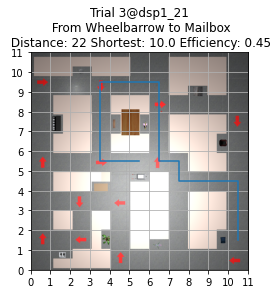

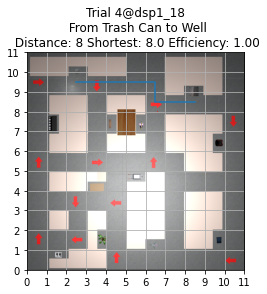

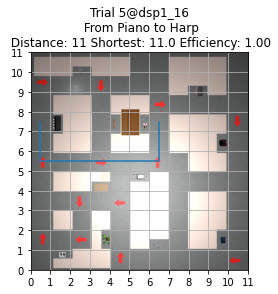

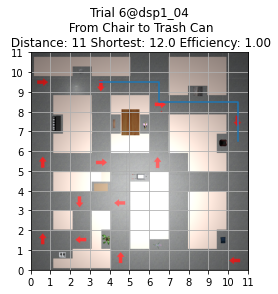

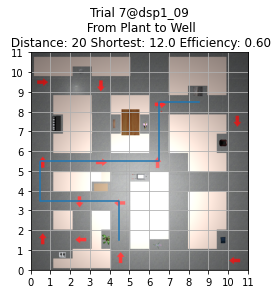

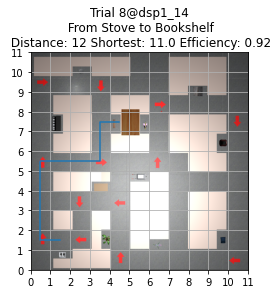

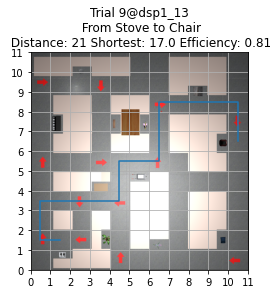

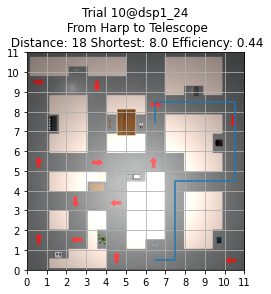

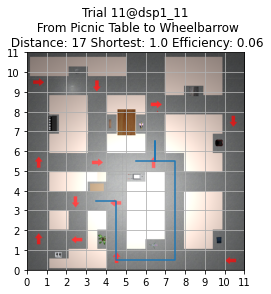

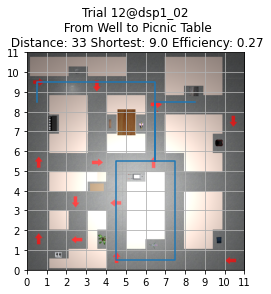

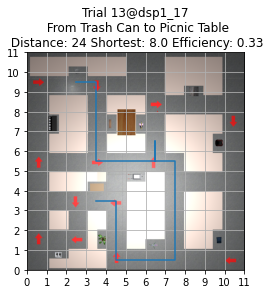

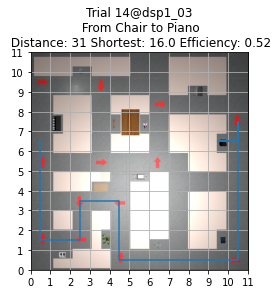

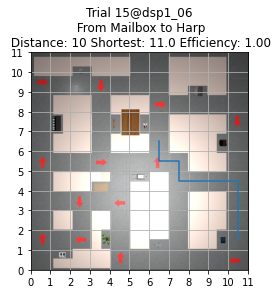

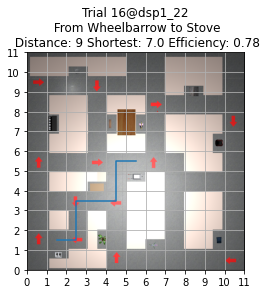

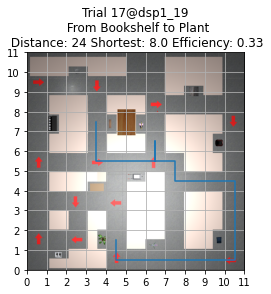

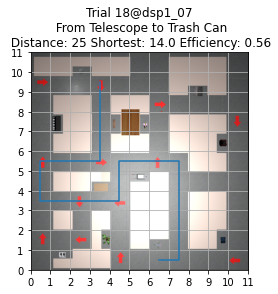

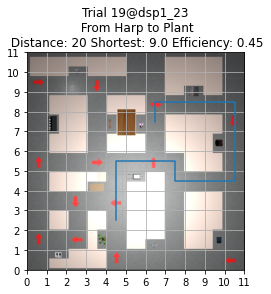

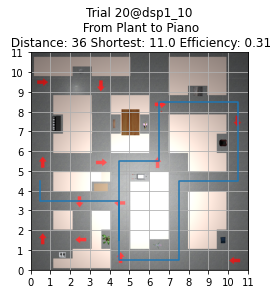

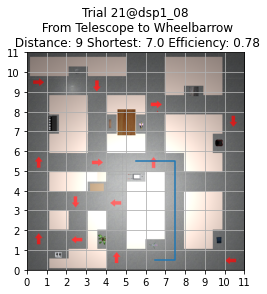

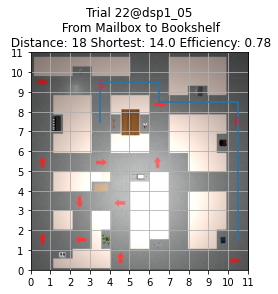

In [1]:
from analysis import Loader
from analysis import MovementAnalyzer, RotationAnalyzer

loader = Loader(data_dir="../data", extra_dir="../extra", image_dir="../images")
loader.load(learning=True)
lexie_test = loader.subjects["lexietest"]

# loader.subjects contains Subject object which named after the data folder(e.g. lexietest)
# Subject contains movement_sequence, rotation_sequence (and meta)
# both are dictionary with trial_number as key
# MovementData is the value for each item in movement_sequence, it contains trial_name, trial_number, trial_time (since that trial started), x, y,
# RotationData is the value for each item in rotation_sequence, it contains trial_name, trial_number, trial_time (how much time does that trial take), rotation

# Currently the movement analyzer can only handle normal (not alternative) trials, will add that later this week
movement_analyzer = MovementAnalyzer(loader)

# rotation analyzer gives the absolute angular error for each trial (both normal and alternative)
rotation_analyzer = RotationAnalyzer(loader)

for n in range(3, 23):
    err = rotation_analyzer.calculate_estimation_error("lexietest", n)
    print(f"TrialNumber {n}, estimation error {err}")

# Noted that though the trial number is always from 3-23, the starting location and target is different between pointing and wayfinding
for n in range(3, 23):
    X, Y = movement_analyzer.load_xy(lexie_test, trial_number=n)
    movement_analyzer.draw(n, X, Y)